### Principal Component Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.isnull().sum()   # no missing values

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df.duplicated().sum()   # no duplicate values

0

<Axes: >

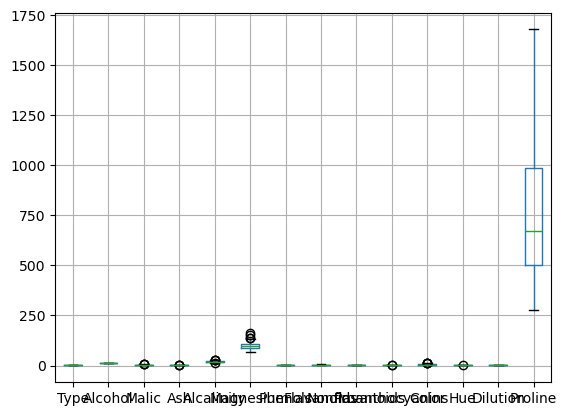

In [7]:
df.boxplot()     # outliers identified

In [8]:
def outliers(df,column):                     # outliers removal using IQR method
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

In [9]:
for i in df.select_dtypes(include=['float','int']).columns:
    outliers(df,i)

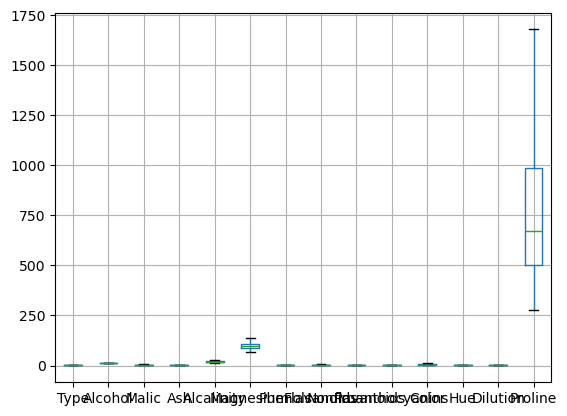

In [10]:
df.boxplot()    # outliers removed
plt.show()     # boxplot

In [11]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.330435,2.366721,19.478090,99.483146,2.295112,2.029270,0.361854,1.586067,5.038146,0.956979,2.611685,746.893258
std,0.775035,0.811827,1.100173,0.263705,3.287757,13.414186,0.625851,0.998859,0.124453,0.558153,2.260881,0.227095,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.688750,10.750000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.302500,3.078750,27.950000,135.500000,3.880000,5.080000,0.660000,3.000000,10.670000,1.626250,4.000000,1680.000000


Examining the distribution of features using Histogram, Boxplot, Density Plots

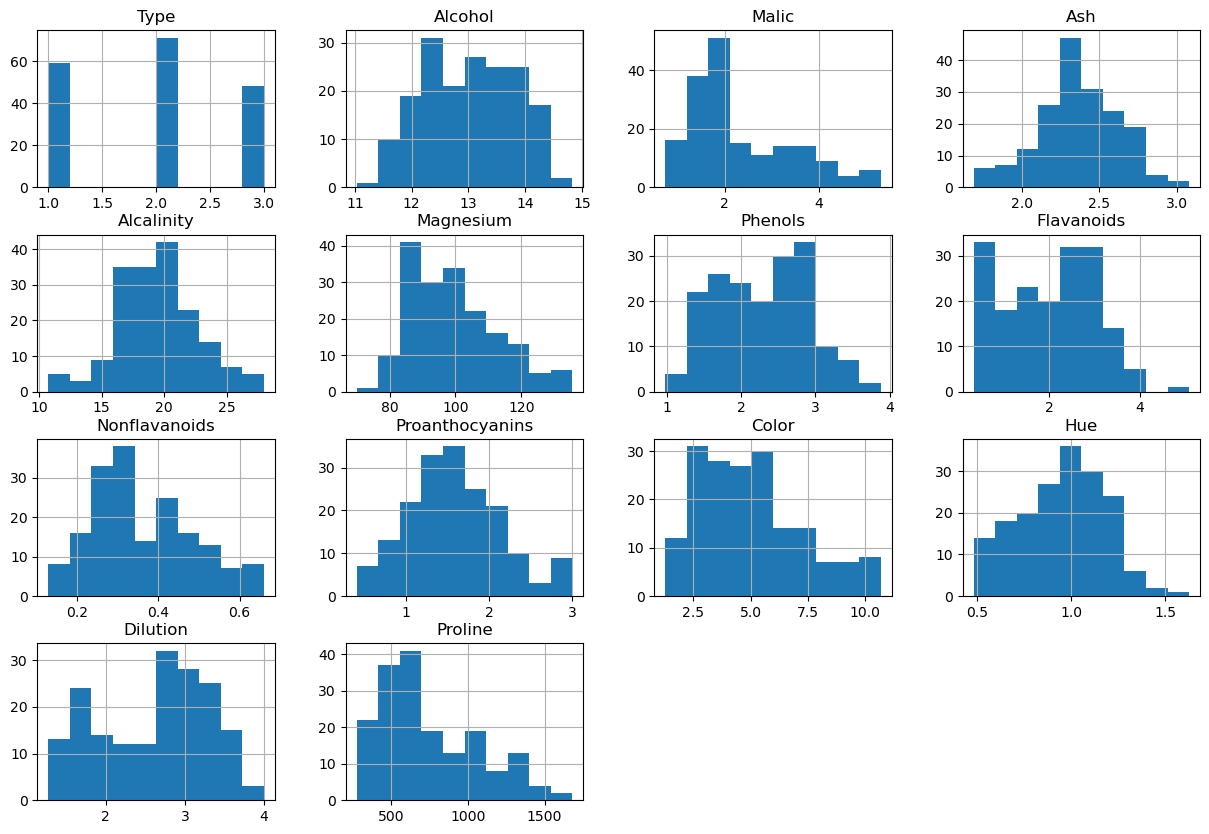

In [13]:
df.hist(figsize=(15,10))    # Histogram
plt.tight_layout
plt.show()

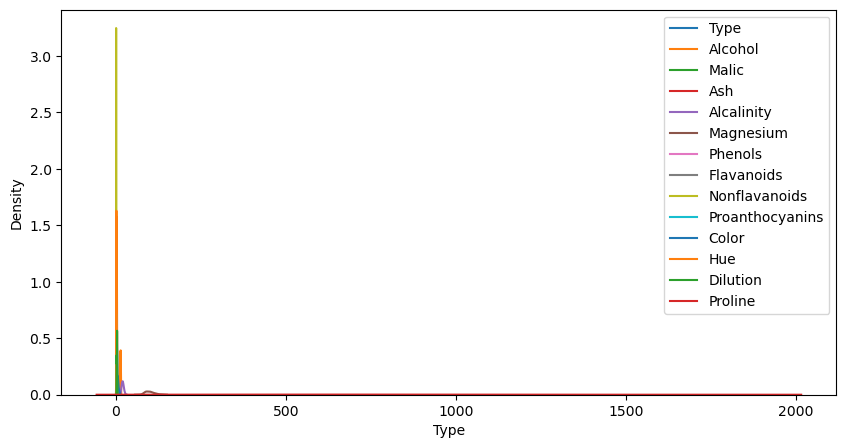

In [14]:
plt.figure(figsize=(10,5))
for i in df.columns:
    sns.kdeplot(df[i],label= i)
plt.legend()
plt.show()
    

In [15]:
# correlation between features
corr= df.corr()

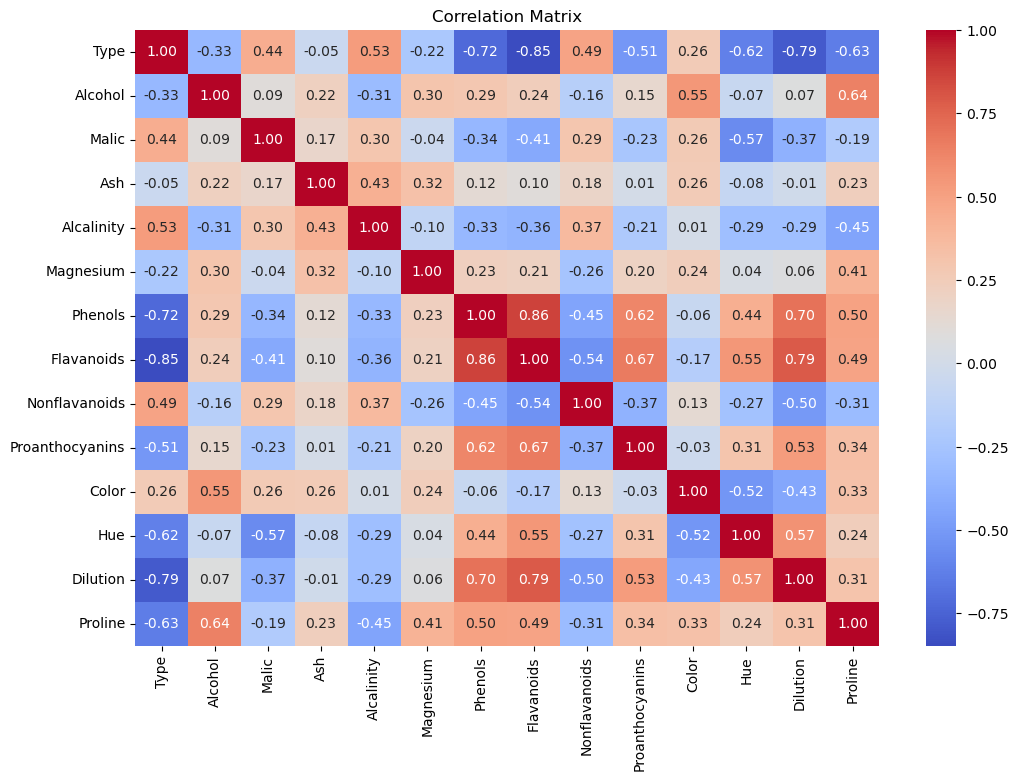

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Standardizing features
scaler= StandardScaler()
df_scaled= scaler.fit_transform(df)

In [18]:
# applying PCA
pca= PCA()
pca.fit(df_scaled)

PCA()

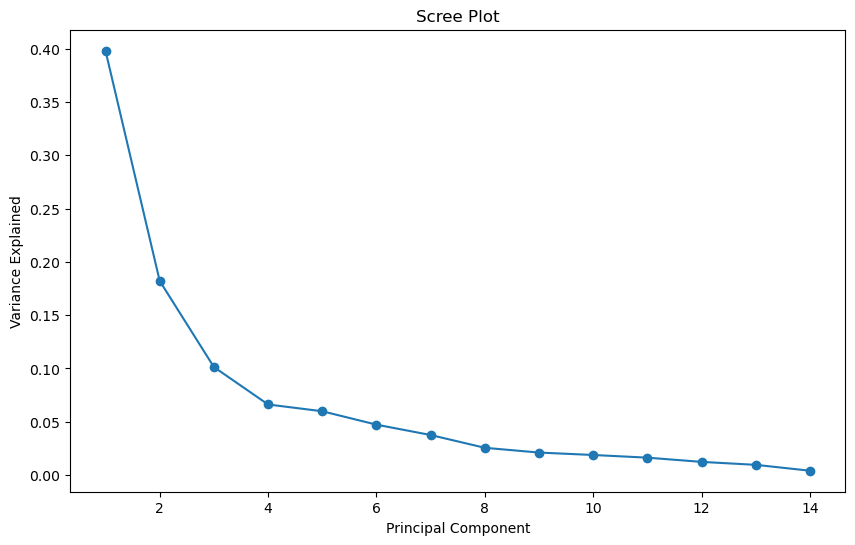

In [19]:
# Scree plot to determine the optimal number of PCA
plt.figure(figsize=(10,6))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
               

In [20]:
# Transforming original data into principal components
pca_components= pca.transform(df_scaled)

In [21]:
# applying KMeans clustering
kmeans= KMeans(n_clusters=3,random_state=42)
clusters_original= kmeans.fit_predict(df_scaled)
df['Cluster']= clusters_original

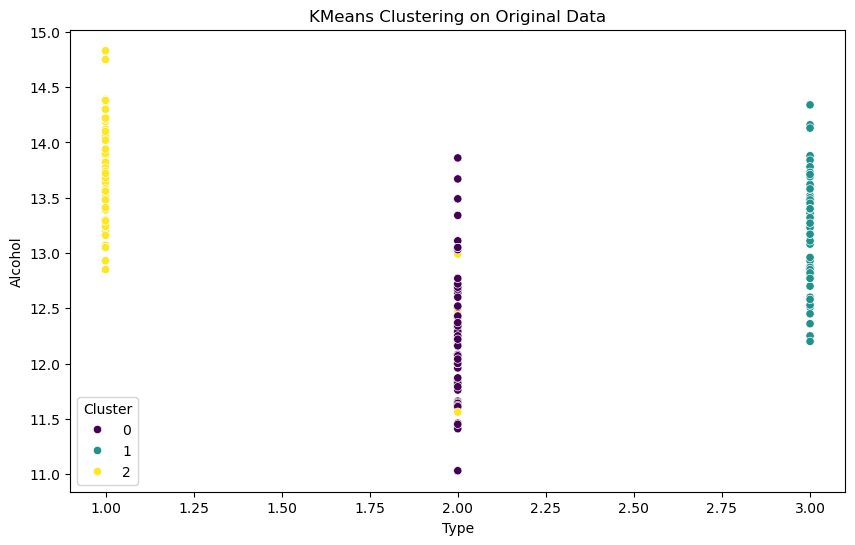

In [22]:
# Visualizing KMeans clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1],hue='Cluster',data=df,palette='viridis')
plt.title('KMeans Clustering on Original Data')
plt.show()

In [23]:
# silhouette score
silhouette= silhouette_score(df_scaled,clusters_original)
davies_bouldin= davies_bouldin_score(df_scaled,clusters_original)

In [24]:
print(f'Silhouette Score: {silhouette}')
print(f'Davies_Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.3069772963964642
Davies_Bouldin Index: 1.3098589498896416


In [25]:
# Clustering with PCA data
kmeans_pca= KMeans(n_clusters=3,random_state=42)
clusters_pca= kmeans_pca.fit_predict(pca_components)

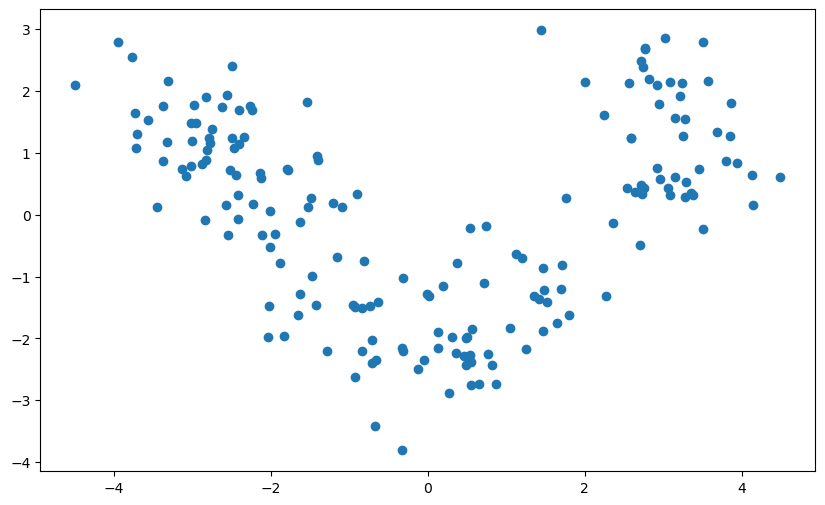

In [26]:
# visualize the clustering 
plt.figure(figsize=(10,6))
plt.scatter(pca_components[:,0],pca_components[:,1])
plt.show()

Summerizing key findings and insights from the assignment.  
1. Dimensionality reductiion, feature transformation and noise elimination, grouping similar data points to identify patterns, enhance clustering performance and interpretability in high dimensional datasets.
2. simplified high dimensional data for visualization and analysis.
3. Clustering is flexible and widely applicable but depends on choosing right algorithm and parameters.  